In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
import sys

import birdsonganalysis as bsa
from cmp_2_sim import plot_gesture_starts

sys.path.append("../model/")
from measures import normalize_and_center, bsa_measure
from song_model import SongModel

fig_width = 16 # full screen: 16 / half screen: 10
fig_height = 5

In [2]:
sr, tutor = wavfile.read("../data/boari_short.wav")
tutor = normalize_and_center(tutor)
priors = [0.0, 0, 3.141592653589793, 50,
         0.00, 0, 0.39269908169872414, 500,
         0.000, 0, 0, 5000,
         2,
         0, 0, 0, 0, -0.15]
rng = np.random.RandomState(0)
sm = SongModel(song=tutor, priors=priors, nb_split=10, rng=rng,
               muta_proba=[0.1, 0.1, 0.75, 0.05])
ab = sm.gen_alphabeta()
song = sm.gen_sound()

g_starts = []
for start, g in sm.gestures:
    g_starts.append(start)
    ab[start] = np.nan


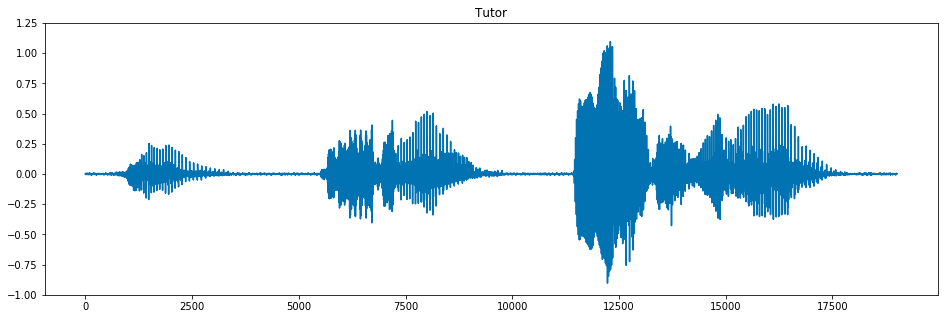

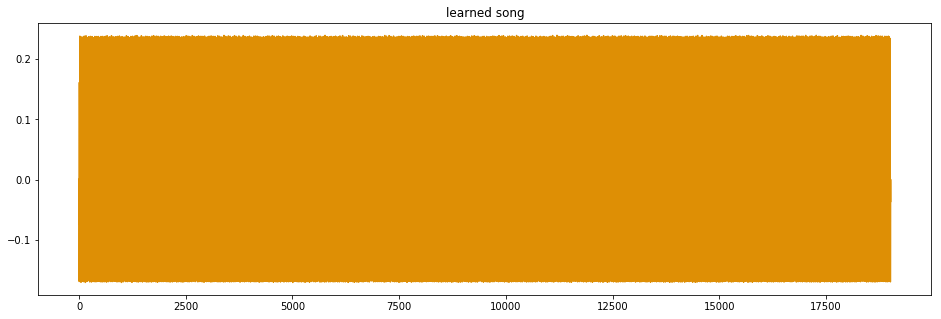

In [3]:
plt.figure(figsize=(fig_width, fig_height))
plt.plot(tutor)
plt.ylim(-1, 1.25)
plt.title("Tutor")
plt.show()

plt.figure(figsize=(fig_width, fig_height))
plt.plot(song, color="C1")
# plt.ylim(-1, 1.25)
plt.title("learned song")
plt.show()

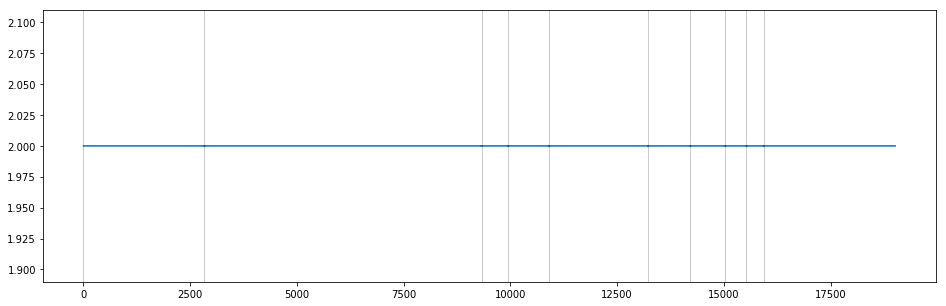

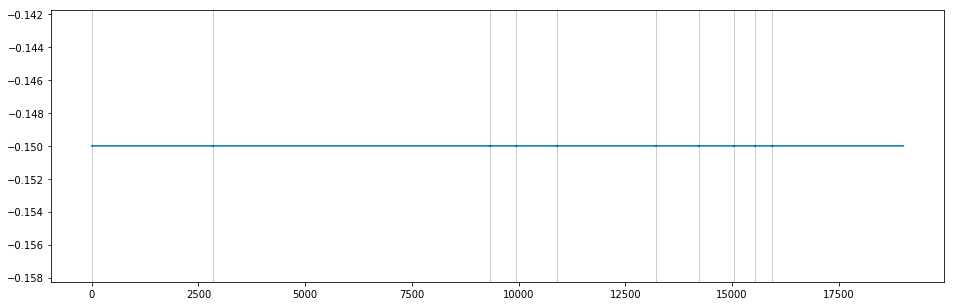

In [4]:
plt.figure(figsize=(fig_width, fig_height))
plt.plot(ab[:,0])
plot_gesture_starts(g_starts)
plt.show()

plt.figure(figsize=(fig_width, fig_height))
plt.plot(ab[:,1])
plot_gesture_starts(g_starts)
plt.show()

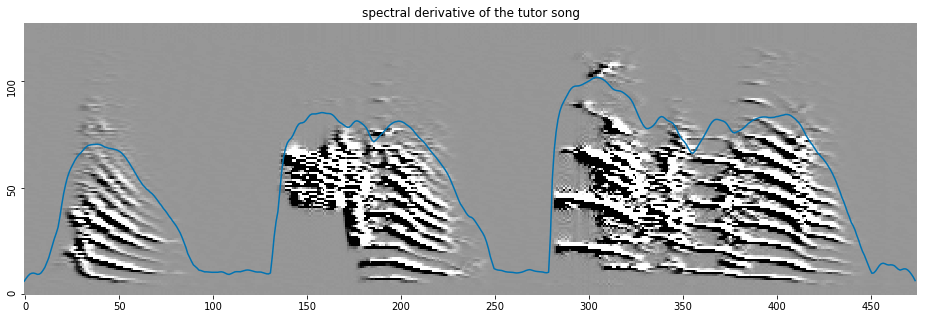

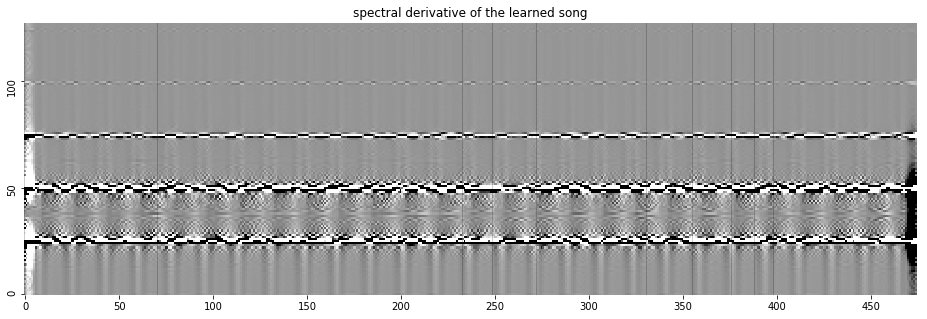

In [5]:
zoom = bsa.FFT_SIZE / bsa.FREQ_RANGE / 4

tutor_spec = bsa.spectral_derivs(tutor,
                                 bsa.FREQ_RANGE, bsa.FFT_STEP,
                                 bsa.FFT_SIZE)
song_spec = bsa.spectral_derivs(song, 
                                bsa.FREQ_RANGE, bsa.FFT_STEP,
                                bsa.FFT_SIZE)

# Spectral derivative of the tutor song
fig = plt.figure(figsize=(fig_width, fig_height))
ax = fig.gca()
bsa.spectral_derivs_plot(tutor_spec, contrast=0.01, ax=ax,
                         freq_range=bsa.FREQ_RANGE)
bsa.plot_over_spec(bsa.song_amplitude(tutor, 
                                      bsa.FREQ_RANGE, bsa.FFT_STEP,
                                      bsa.FFT_SIZE),
                   ax=ax, zoom=zoom)
ax.set_ylim(0, bsa.FREQ_RANGE * zoom)
plt.title("spectral derivative of the tutor song")
plt.show(fig)

# Spectral derivative of the learned song
fig = plt.figure(figsize=(fig_width, fig_height))
ax = fig.gca()
bsa.spectral_derivs_plot(song_spec, contrast=0.01, ax=ax)
# bsa.plot_over_spec(bsa.song_amplitude(song,
#                                       bsa.FREQ_RANGE, bsa.FFT_STEP,
#                                       bsa.FFT_SIZE),
#                    ax=ax, zoom=zoom)
ax.set_ylim(0, bsa.FREQ_RANGE * zoom)
plot_gesture_starts(g_starts, scale=bsa.FFT_STEP)
plt.title("spectral derivative of the learned song")
plt.show(fig)

In [6]:
# g and c are outputs from the bsa_measure function
error_measure = lambda g, c: np.linalg.norm(g - c)

tutor_feat = bsa.all_song_features(tutor, bsa.SR,
                                   freq_range=bsa.FREQ_RANGE,
                                   fft_step=bsa.FFT_STEP,
                                   fft_size=bsa.FFT_SIZE)


coefs = {"fm": 1, "am": 1, "entropy": 1, "goodness": 1,
         "amplitude": 1, "pitch": 0, "rms":1}
mtutor = bsa_measure(tutor, sr, coefs, tutor_feat)
msong = bsa_measure(song, sr, coefs, tutor_feat)

song_err = error_measure(mtutor, msong)
print(song_err)

34.86006318831058
